# Tarea 1: Minería de Datos con datos sobre COVID-19

**Autor**: Diego Canales Vallejos

**Carrera**: Ingeniería Civil Telemática

**Asignatura**: Introducción a la Inteligencia Artificial (IIE575-1)

**Docente**: Dra. Millaray Curilem Saldias

**Departamento de Ingeniería Eléctrica**

**Universidad de La Frontera**

# Desarrollo

## Knowledge Discovery in Databases (KDD)

Para realizar el análisis de los datos de esta actividad se utilizará el procedimiento Knowledge Discovery in Databases (KDD). Este procedimiento consta de repetición de la aplicación de las siguientes etapas para encontrar e interpretar patrones en los datos.
1. **Abstracción del escenario:** Entender la problemática y tener contexto para de las posibles soluciones.
2. **Selección de datos:** Crear o seleccionar un dataset sobre cual se desea realizar el análisis.
3. **Preprocesamiento:** Limpieza de los datos. 
  - Remover el ruido o los datos outliers.
  - Obtener la información necesaria para modelar.
  - Utilizar estrategias para manejar datos faltantes.
4. **Transformación:** Transformaciones a los datos para mejorar el anáálisis.
  - Reduccióón de dimensionalidad.
  - Convertir valores numéricos a categóóricos o vicecersa.
5. **Elección de la tarea de Minería de Datos:**
  - Clasificación.
  - Regresión.
  - Clustering.
  - Otros.
6. **Elección algoritmo de Minería de Datos :**
  - Seleccionar el o los métodos utilizaddos para buscar patrones en los datos.
  - Decidir que modelos y que parámetros son los apropiados.
7. **Minería de datos**:
  - Buscar patrones de interés en una forma de presentación particular.
8. **Interpretacióón de los patrones minados.**
9. **Consolidar el conocimiento descubrido.**



![KDD](https://base-de-datos62.webnode.com.co/_files/200000010-c84f4c9490/450/Blank%20Diagram%20-%20Page%201.png)

## Selección de datos

**Reporte diario COVID-19**

El repositorio de base de datos a utilizar es del Center for Systems Science and Engineering (CSSE) de la Universidad Johns Hopkins,  Baltimore, Estados Unidos de Reporte diario COVID-19.

https://github.com/CSSEGISandData/COVID-19

Los datos son obtenidos desde diversas fuentes indicadas en la siguiente url.

https://github.com/CSSEGISandData/COVID-19/blob/master/README.md

Especificamente se utilizará el dataset del día 05-06-2020

https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/05-06-2020.csv

**POBLACION POR PAIS**

https://worldpopulationreview.com/countries/

**DENSIDAD DE CAMAS POR PAIS**

https://www.cia.gov/library/publications/the-world-factbook/fields/360.html


### Importar datasets

In [0]:
import pandas as pd

# IMPORTE DATOS REPORTE CONTAGIADOS COVID-19
path_reporte_covid19 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-05-2020.csv'
reporte_covid19 = pd.df = pd.read_csv(path_reporte_covid19)
# IMPORTE DATOS POBLACION POR PAIS
path_poblacion = 'https://raw.githubusercontent.com/DiegoCanales/IIE575-AI-T1/master/world_population_by_country.csv'
poblacion =  pd.read_csv(path_poblacion)
# IMPORTE DENSIDAD DE CAMAS POR PAIS
densidad_camas =  pd.read_html('https://www.cia.gov/library/publications/the-world-factbook/fields/360.html')
densidad_camas = densidad_camas[0]


Se importan los archivos CSV con Pandas biblioteca para el manejo de datos de Python.

Luego se realiza una exploración rápida de los datasets, esto es el tamaño de estos y los tipos de datos de las columnas.

### Dataset Reporte Infectados Covid-19

In [0]:
print('dimensiones:'+str(reporte_covid19.shape))
print('tipo de datos')
print(reporte_covid19.dtypes)
reporte_covid19.head() # primeros 5 registros

dimensiones:(3209, 12)
tipo de datos
FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Last_Update        object
Lat               float64
Long_             float64
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
Combined_Key       object
dtype: object


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-06 02:32:31,34.223334,-82.461707,33,0,0,33,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-06 02:32:31,30.295065,-92.414197,136,10,0,126,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-06 02:32:31,37.767072,-75.632346,429,7,0,422,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-06 02:32:31,43.452658,-116.241552,713,19,0,694,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-06 02:32:31,41.330756,-94.471059,2,0,0,2,"Adair, Iowa, US"


### Dataset Población por País


In [0]:
print('dimensiones:'+str(poblacion.shape))
print('tipo de datos')
print(poblacion.dtypes)
poblacion.head() # primeros 5 registros

dimensiones:(232, 7)
tipo de datos
Rank            int64
name           object
pop2020       float64
pop2019       float64
GrowthRate    float64
area          float64
Density       float64
dtype: object


,Rank,name,pop2020,pop2019,GrowthRate,area,Density
0,1,China,1439323.776,1433783.686,1.0039,9706961.0,147.7068
1,2,India,1380004.385,1366417.754,1.0099,3287590.0,415.6290
2,3,United States,331002.651,329064.917,1.0059,9372610.0,35.1092
3,4,Indonesia,273523.615,270625.568,1.0107,1904569.0,142.0928
4,5,Pakistan,220892.340,216565.318,1.0200,881912.0,245.5634


### Dataset Densidad de camas

In [0]:
print('dimensiones:'+str(densidad_camas.shape))
print('tipo de datos')
print(densidad_camas.dtypes)
densidad_camas.head()

dimensiones:(182, 2)
tipo de datos
Country                 object
Hospital bed density    object
dtype: object


,Country,Hospital bed density
0,Afghanistan,"0.5 beds/1,000 population (2014)"
1,Albania,"2.9 beds/1,000 population (2013)"
2,Algeria,"1.9 beds/1,000 population (2015)"
3,Andorra,"2.5 beds/1,000 population (2009)"
4,Antigua and Barbuda,"3.8 beds/1,000 population (2014)"


## Preprocesamiento

- Se observa la cantidad de datos perdidos que tienen las columnas.
- Se eliminan los registros con ciertos datos perdidos.
- Se extrae el valor sobre densidad de camas del dataset, ya que se encuentra en un string.

### Limpieza de datos

In [0]:
print('Datos perdidos dataset reporte covid19 camas \n'+str(reporte_covid19.isnull().sum()), end='\n\n')
print('Datos perdidos dataset poblacion \n'+str(poblacion.isnull().sum()), end='\n\n')
print('Datos perdidos dataset densidad camas \n'+str(densidad_camas.isnull().sum()), end='\n\n')

Datos perdidos dataset reporte covid19 camas 
FIPS              275
Admin2            272
Province_State    183
Country_Region      0
Last_Update         0
Lat                66
Long_              66
Confirmed           0
Deaths              0
Recovered           0
Active              0
Combined_Key        0
dtype: int64

Datos perdidos dataset poblacion 
Rank          0
name          0
pop2020       0
pop2019       0
GrowthRate    0
area          0
Density       0
dtype: int64

Datos perdidos dataset densidad camas 
Country                 0
Hospital bed density    2
dtype: int64



#### Reporte Casos COVID-19

In [0]:
reporte_covid19 = reporte_covid19[reporte_covid19['Lat'].notna()]
reporte_covid19 = reporte_covid19[reporte_covid19['Long_'].notna()]

#### Población

In [0]:
poblacion.rename(columns={'name':'país',
                          'pop2020':'población'}, 
                 inplace=True)

#### Densidad de camas

In [0]:
# dividir el string de la columna Hospital bed density para obtener el valor
aux = densidad_camas['Hospital bed density'].str.split(expand=True)
# se guarda el valor de la densidad en la nueva columna 'densidad camas hospital'
densidad_camas['densidad camas hospital'] = aux[0] 
del aux # elimina la variable aux
# elimina la columna 'Hospital bed density' que contiene el string completo
densidad_camas = densidad_camas.drop('Hospital bed density', axis=1)
# cambia el tipo de la nueva columna a float
densidad_camas['densidad camas hospital'] = densidad_camas['densidad camas hospital'].astype(float)
# elimina las columnas sin datos
densidad_camas = densidad_camas.dropna()
# ordenar los datos según densidad de datos de manera descendiente
densidad_camas.sort_values(by='densidad camas hospital', inplace=True, ascending=False)
# 10 paises con mayor densidad
densidad_camas.head(10)

,Country,densidad camas hospital
112,Monaco,13.8
85,Japan,13.4
90,"Korea, North",13.2
91,"Korea, South",11.5
14,Belarus,11.0
169,Ukraine,8.8
150,Somalia,8.7
63,Germany,8.3
136,Russia,8.2
66,Greenland,8.2


### Visualización de datos

- Se visualizan de forma gráfica los datasets despúúes de la limpieza de datos.

In [0]:
import matplotlib.pyplot as plt
import folium
import numpy as np

#### Reporte Casos COVID-19

In [0]:
m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=2)

for i in range(0, len(reporte_covid19)):
    folium.Circle(
        location=[reporte_covid19.iloc[i]['Lat'], reporte_covid19.iloc[i]['Long_']],
        color='crimson', fill='crimson',
        tooltip =   '<li><bold>Country : '+str(reporte_covid19.iloc[i]['Country_Region'])+
                    '<li><bold>Province : '+str(reporte_covid19.iloc[i]['Province_State'])+
                    '<li><bold>Confirmed : '+str(reporte_covid19.iloc[i]['Confirmed'])+        
                    '<li><bold>Confirmed : '+str(reporte_covid19.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(reporte_covid19.iloc[i]['Deaths']),
        radius=int(reporte_covid19.iloc[i]['Confirmed'])*5).add_to(m)
    
m

#### Población

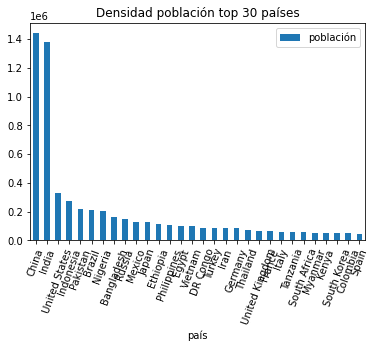

In [0]:
poblacion.sort_values(by='población', inplace=True, ascending=False)
top = 30
poblacion.head(top).plot.bar(x='país', y='población', rot=70, title='Densidad población top '+str(top)+' países')
plt.show(block=True)

#### Densidad de camas

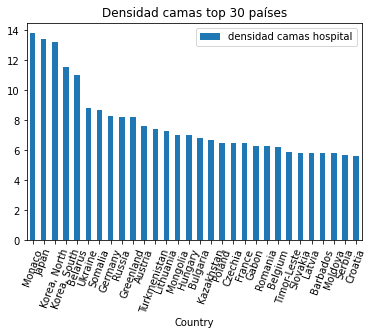

In [0]:
top = 30
densidad_camas.head(top).plot.bar(x='Country', y='densidad camas hospital', rot=70, title='Densidad camas top '+str(top)+' países')
plt.show(block=True)

## Transformación

Se ajustan nuevamente los dataset para realizar la unión de los tres.

### Agrupar datos
Se agruparán los datos del dataset reportes COVID-19 en por país debido a que algunos países (US, Canadá, Francia, entre otros) tienen datos de casos por provincia.

In [0]:
reporte_covid19 = reporte_covid19.drop(['FIPS','Admin2','Province_State',
                      'Last_Update', 'Combined_Key', 'Lat', 'Long_'], axis = 1)

reporte_covid19 = reporte_covid19.groupby(by='Country_Region', as_index=False).sum()

reporte_covid19.loc[reporte_covid19['Country_Region'] == 'US', ['Country_Region']] = 'United States'

In [0]:
reporte_covid19

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,3224,95,421,2708
1,Albania,820,31,570,219
2,Algeria,4838,470,2067,2301
3,Andorra,751,46,514,191
4,Angola,36,2,11,23
...,...,...,...,...,...
180,West Bank and Gaza,371,2,127,242
181,Western Sahara,6,0,5,1
182,Yemen,22,4,1,17
183,Zambia,138,3,92,43


### Eliminación de columnas a no utilizar

In [0]:
poblacion = poblacion.drop(['pop2019','Rank','area','GrowthRate'], axis = 1)
#reporte_covid19 = reporte_covid19.drop(['FIPS','Admin2','Province_State',
#                      'Last_Update', 'Combined_Key'], axis = 1)

### Unión de datasets

In [0]:
#dataset = pd.merge(densidad_camas, poblacion, left_on='Country', right_on='país')
dataset = pd.merge(poblacion,densidad_camas, left_on='país', right_on='Country')
print(dataset.shape)
dataset = pd.merge(dataset, reporte_covid19, left_on='Country', right_on='Country_Region')
print(dataset.shape)
dataset = dataset.drop(['Country_Region', 'país'], axis=1)

(168, 5)
(158, 10)


In [0]:
print(dataset.shape)
dataset.head()

(158, 8)


,población,Density,Country,densidad camas hospital,Confirmed,Deaths,Recovered,Active
0,1439323.776,147.7068,China,4.2,83968,4637,78870,461
1,1380004.385,415.6290,India,0.7,49400,1693,14142,33565
2,331002.651,35.1092,United States,2.9,1196188,70392,0,1125796
3,273523.615,142.0928,Indonesia,1.2,12071,872,2197,9002
4,220892.340,245.5634,Pakistan,0.6,22049,514,5801,15734


Existe una disminución al unir los datasets por 'Country' debido a la manera de que están escritos. Esto se puede solucionar haciendo un fuzzy merge utilizando la librería FuzzyWuzzy de Python que utiliza la [distancia Levenshtein](https://en.wikipedia.org/wiki/Levenshtein_distance).

> In information theory, linguistics and computer science, the Levenshtein distance is a **string metric for measuring the difference between two sequences**. Informally, the Levenshtein distance between two words is the **minimum number of single-character edits (insertions, deletions or substitutions) required to change one word into the other**. 


- https://stackoverflow.com/questions/13636848/is-it-possible-to-do-fuzzy-match-merge-with-python-pandas

- https://towardsdatascience.com/how-to-do-fuzzy-matching-in-python-pandas-dataframe-6ce3025834a6

In [0]:
dataset.describe()

,población,Density,densidad camas hospital,Confirmed,Deaths,Recovered,Active
count,1.580000e+02,158.000000,158.000000,1.580000e+02,158.000000,158.000000,1.580000e+02
mean,4.484358e+04,334.822684,3.082911,2.289117e+04,1617.215190,6082.689873,1.519127e+04
std,1.625811e+05,1668.735246,2.445200,1.019454e+05,7097.889479,19713.888860,9.166306e+04
min,3.393100e+01,2.062000,0.100000,3.000000e+00,0.000000,0.000000,0.000000e+00
25%,2.878611e+03,35.701825,1.300000,1.465000e+02,4.000000,51.250000,5.750000e+01
50%,9.775377e+03,88.310850,2.600000,1.375000e+03,25.000000,408.000000,5.500000e+02
75%,3.120981e+04,199.298450,4.275000,9.411000e+03,232.250000,1865.750000,5.444250e+03
max,1.439324e+06,19289.108900,13.800000,1.196188e+06,70392.000000,135100.000000,1.125796e+06


Se normalizan los datos diviendo las columnas por el valor promedio de cada uno, esto para que los valores estén en rangos similares al ser ingresados a algúún modelo.

In [0]:
# normalización de las columnas por división

dataset["población"] = dataset["población"] / dataset["población"].mean()
dataset["Density"] = dataset["Density"] / dataset["Density"].mean()

dataset["densidad camas hospital"] = dataset["densidad camas hospital"] / dataset["densidad camas hospital"].mean()
dataset["Confirmed"] = dataset["Confirmed"] / dataset["Confirmed"].mean()
dataset["Deaths"] = dataset["Deaths"] / dataset["Deaths"].mean()
dataset["Recovered"] = dataset["Recovered"] / dataset["Recovered"].mean()
dataset["Active"] = dataset["Active"] / dataset["Active"].mean()

dataset.head()

,población,Density,Country,densidad camas hospital,Confirmed,Deaths,Recovered,Active
0,32.096543,0.441149,China,1.362349,3.668139,2.867275,12.966303,0.030346
1,30.773736,1.241341,India,0.227058,2.158037,1.046861,2.324958,2.209493
2,7.381272,0.104859,United States,0.940669,52.255431,43.526675,0.000000,74.108110
3,6.099505,0.424382,Indonesia,0.389242,0.527321,0.539198,0.361189,0.592577
4,4.925841,0.733413,Pakistan,0.194621,0.963210,0.317830,0.953690,1.035727


In [0]:
dataset.describe()

,población,Density,densidad camas hospital,Confirmed,Deaths,Recovered,Active
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3.625517,4.983937,0.793147,4.453482,4.388958,3.240982,6.033932
min,0.000757,0.006158,0.032437,0.000131,0.000000,0.000000,0.000000
25%,0.064192,0.106629,0.421679,0.006400,0.002473,0.008426,0.003785
50%,0.217988,0.263754,0.843359,0.060067,0.015459,0.067076,0.036205
75%,0.695971,0.595236,1.386676,0.411119,0.143611,0.306731,0.358380
max,32.096543,57.609923,4.476288,52.255431,43.526675,22.210568,74.108110


### Visualización del dataset

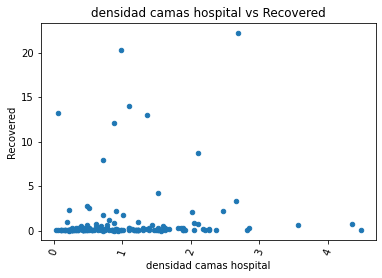

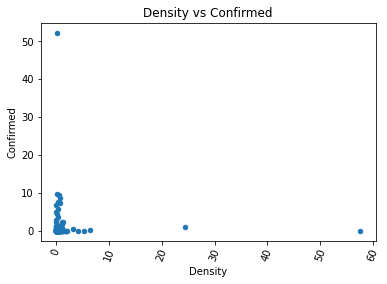

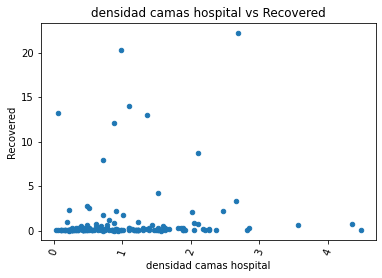

In [0]:
top = 30
#dataset.head(top).plot.scatter(x='densidad camas hospital', y='Recovered', rot=70, title='Densidad población top '+str(top)+' países')
x='densidad camas hospital'
y='Recovered'
dataset.plot.scatter(x=x, y=y, rot=70, title=x+' vs '+y)
plt.show(block=True)

x='Density'
y='Confirmed'
dataset.plot.scatter(x=x, y=y, rot=70, title=x+' vs '+y)
plt.show(block=True)

x='densidad camas hospital'
y='Recovered'
dataset.plot.scatter(x=x, y=y, rot=70, title=x+' vs '+y)
plt.show(block=True)


### Correlación

Este varía en el intervalo [-1,1], estableciendo el signo el sentido de la relación, y la interpretación de cada resultado es el siguiente:

- Si **r = 1**: Correlación positiva perfecta. El índice refleja la dependencia total entre ambas dos variables, la que se denomina relación directa: **cuando una de las variables aumenta, la otra variable aumenta en proporción constante**.
- Si **0 < r < 1**: Refleja que se da una **correlación positiva**.
- Si **r = 0**: En este caso **no hay una relación lineal**. Aunque no significa que las variables sean independientes, ya que puede haber relaciones no lineales entre ambas variables.
- Si **-1 < r < 0**: Indica que existe una **correlación negativa**.
- Si **r = -1**: Indica una **correlación negativa perfecta y una dependencia total entre ambas variables** lo que se conoce como "relación inversa", que es **cuando una de las variables aumenta, la otra variable en cambio disminuye en proporción constante**.


In [0]:
dataset.corr(method='pearson')

,población,Density,densidad camas hospital,Confirmed,Deaths,Recovered,Active
población,1.000000,-0.020415,-0.046241,0.223458,0.178646,0.298912,0.170404
Density,-0.020415,1.000000,0.315920,-0.024316,-0.027710,-0.033406,-0.017714
densidad camas hospital,-0.046241,0.315920,1.000000,0.049716,0.046609,0.120820,0.025699
Confirmed,0.223458,-0.024316,0.049716,1.000000,0.929653,0.296054,0.976516
Deaths,0.178646,-0.027710,0.046609,0.929653,1.000000,0.377364,0.875344
Recovered,0.298912,-0.033406,0.120820,0.296054,0.377364,1.000000,0.084974
Active,0.170404,-0.017714,0.025699,0.976516,0.875344,0.084974,1.000000


- La **población** tiene una **correlación positiva** con los casos del **reporte COVID-19** (confirmados, muertos, recuperados, activos) y correlación negativa con la **densidad de camas de hospital**.
- La **densidad de población** tiene una **leve correlación negativa** con los casos del **reporte COVID-19** (confirmados, muertos, recuperados, activos).

- La **densidad camas hospital** presenta una **mayor correlación positiva** con los datos de **recuperados de COVID-19**.

### Reducción de dimensionalidad

¿Se puede representar el dataset con menores características?

#### PCA

- Identifica patrones en los datos basados en la correlación entre características.
- Encuentra las direcciones de variación máxima en datos de alta dimensión y los proyecta en un nuevo subespacio con dimensiones iguales o menores que el original.

![pca](https://miro.medium.com/max/998/1*V9yJUH9tVrMQI88TuIkCFQ.gif)


In [0]:
from sklearn.preprocessing import StandardScaler

# Separación de características
#features = ['población', 'Density', 'densidad camas hospital', 'Confirmed', 'Deaths', 'Recovered', 'Active']
features = ['población','Density', 'densidad camas hospital', 'Active']
x = dataset.loc[:, features].values

from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.49344658, 0.33168072, 0.16737043, 0.00750227])

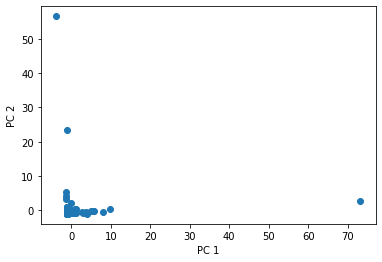

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

Existe una variabilidad de los datos muy grande entre algunas características por lo que el PCA no es efectivo, por lo cual queda muy similar si se toman dos de las características más variables.

## Mejoras

- Realizar una nueva iteración de preprocesamiento de datos en el dataset la transformado:
  - Eliminar "valores fuera de rango".
  - Visualizar nuevamente la data.
  - Determinar si existe algúún patrón visible gráficamente.
- Realizar clústering (K-MEANS) para resolver la pregunta **¿Existen grupos observables de países con comportamientos similares ante la pandemia?**
- Añadiendo el tipo de economía se puede realizar un clasificación con respecto a esta característica.